In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
G = nx.read_graphml('data/openflights_usa.graphml.gz')

In [5]:
G.nodes()

NodeView(('RDD', 'EUG', 'IDA', 'MFR', 'RDM', 'OOK', 'ABL', 'BKC', 'ITO', 'OBU', 'ORV', 'WLK', 'KTS', 'CAK', 'HSV', 'PKB', 'MGM', 'TRI', 'PAH', 'KKA', 'SMK', 'SKK', 'TNC', 'AKB', 'PGA', 'FCA', 'MBS', 'BGM', 'KFP', 'NLG', 'KLW', 'KWN', 'HNM', 'KYU', 'SCM', 'BTI', 'NME', 'KKH', 'NIB', 'PSG', 'AIN', 'CIC', 'KUK', 'WNA', 'IRC', 'SFB', 'SLQ', 'JST', 'HKB', 'MLY', 'CLM', 'KWT', 'ELI', 'GLV', 'PSM', 'TLA', 'WAA', 'MSO', 'HVR', 'HHH', 'GRK', 'TVF', 'SGY', 'MLL', 'RBY', 'EGE', 'CSG', 'LAW', 'FLG', 'ANV', 'TWF', 'MVY', 'KVC', 'STC', 'GTR', 'ERI', 'HYA', 'PTH', 'AUK', 'MGW', 'CRW', 'AVP', 'BJI', 'FAR', 'KPN', 'GCC', 'SVA', 'SCE', 'HGR', 'KOT', 'MEI', 'SPI', 'CEZ', 'HDN', 'LBL', 'COD', 'SGF', 'JLN', 'ABE', 'XNA', 'SBN', 'CKB', 'LRD', 'ORH', 'ACV', 'OAJ', 'DBQ', 'GGG', 'PVC', 'KTN', 'GGW', 'OGD', 'PIH', 'PDT', 'LUR', 'PIZ', 'RAP', 'BTT', 'FYU', 'ATK', 'TLJ', 'SNP', 'IGG', 'STG', 'ILI', 'PTU', 'AZA', 'FSM', 'KAL', 'GFK', 'KSM', 'PRC', 'TTN', 'BOS', 'KVL', 'OAK', 'OMA', 'HOT', 'OGG', 'ICT', 'MCI', 'MS

In [6]:
G.nodes['IND']

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

In [7]:
G.nodes['IND']['name']

'Indianapolis International Airport'

In [8]:
listex = [1,2,3,4]
4 in listex

True

In [9]:
6 in listex

False

In [10]:
H = nx.path_graph(10)

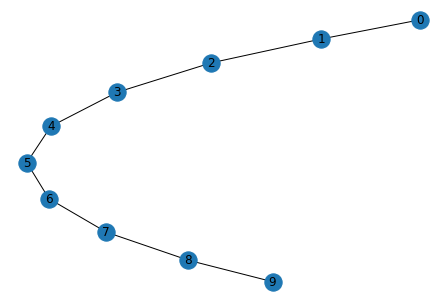

In [11]:
pos = nx.spring_layout(H)
nx.draw(H,pos=pos,with_labels=True)

In [12]:
nx.is_connected(H)

True

In [13]:
H.edges()

EdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

In [14]:
H.remove_edge(2,3)

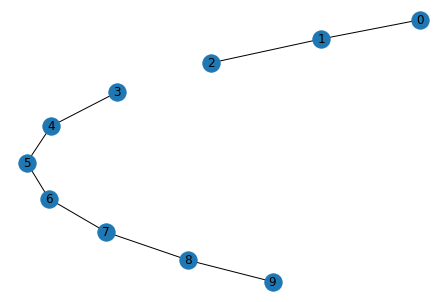

In [15]:
nx.draw(H,pos=pos,with_labels=True)

In [16]:
nx.is_connected(H)

False

In [17]:
nx.number_connected_components(H)

2

In [18]:
components = [c for c in nx.connected_components(H)]

In [19]:
components

[{0, 1, 2}, {3, 4, 5, 6, 7, 8, 9}]

In [20]:
maxcomp = max(components, key=len)
maxcomp

{3, 4, 5, 6, 7, 8, 9}

In [21]:
len(maxcomp)/H.number_of_nodes()

0.7

In [22]:
HLC = H.subgraph(maxcomp)

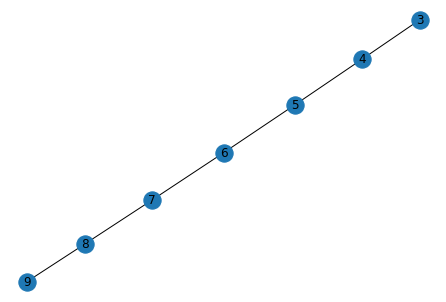

In [23]:
nx.draw(HLC,with_labels=True)

In [24]:
dc = dict(HLC.degree)

In [25]:
dc

{3: 1, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 1}

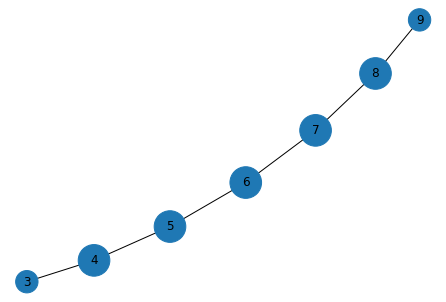

In [26]:
nx.draw(HLC,with_labels=True,node_size=[500*v for v in dc.values()])

In [27]:
import networkx.algorithms.community as nxcom

In [28]:
G = nx.lollipop_graph(4,6)

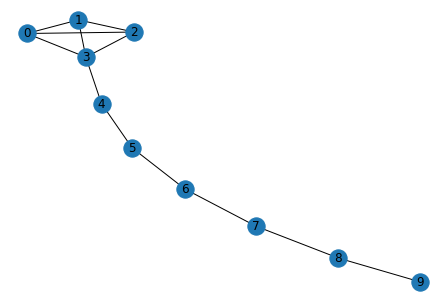

In [29]:
nx.draw(G,with_labels=True)

In [30]:
nxcom.greedy_modularity_communities(G)

[frozenset({0, 1, 2, 3}), frozenset({6, 7, 8, 9}), frozenset({4, 5})]

In [31]:
comm = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
comm

[frozenset({0, 1, 2, 3}), frozenset({6, 7, 8, 9}), frozenset({4, 5})]

In [32]:
nxcom.label_propagation_communities(G)

<generator object label_propagation_communities at 0x13d9cbdd0>

In [33]:
comm = [c for c in nxcom.label_propagation_communities(G)]

In [34]:
comm

[{7, 8, 9}, {0, 1, 2, 3, 4}, {5, 6}]

In [35]:
nodesred = [0,1,2,3,4]
nodesblue = [5,6]
nodesgreen = [7,8,9]

In [36]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [37]:
# this adds an attribute to a node
for v in G.nodes():
    if v in nodesred:
        G.nodes[v]['color'] = 'red'
    elif v in nodesblue:
        G.nodes[v]['color'] = 'blue'
    else:
        G.nodes[v]['color'] = 'green'

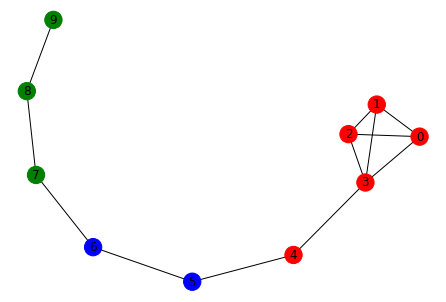

In [38]:
nx.draw(G,with_labels=True,node_color = [G.nodes[v]['color'] for v in G.nodes()])

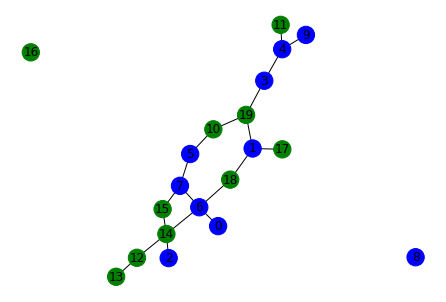

In [41]:
G = nx.erdos_renyi_graph(20, 0.1)
color_map = []
for node in G:
    if node < 10:
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()